In [1]:
#Required Libraries
# !pip install graphviz
# !pip install seaborn
# !pip install pydotplus
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
from sklearn.svm import SVC
from sklearn import  datasets
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz 
import seaborn as sns
from IPython.display import Image  
import pydotplus
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm
import pandas
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas
from sklearn.utils import shuffle
from sklearn import svm
import xgboost as xgb
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from xgboost import XGBClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
from pandas.api.types import CategoricalDtype 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve,GridSearchCV


In [2]:
np.random.seed(50)
df = pandas.read_csv('generated.csv')
testing1= pandas.read_csv('Val.csv')
testing2= pandas.read_csv('Test.csv')

In [3]:
algorithm=[]
f1_test1=[]
f1_test2=[]

In [4]:
X = df
y = X.attack
X = X.drop(['attack'],axis=1)

In [5]:
X_test1 = testing1
y_test1 = X_test1.attack
X_test1 = X_test1.drop(['attack'],axis=1)

In [6]:
X_test2 = testing2
y_test2 = X_test2.attack
X_test2 = X_test2.drop(['attack'],axis=1)

# DT

In [7]:
classifier = DecisionTreeClassifier()
depth_range = list(range(5, 20))
#param_grid_dt = dict(max_depth=depth_range)
param = {'max_depth': depth_range}
grid = GridSearchCV(classifier, param, cv=10, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

1.0
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)


DecisionTreeClassifier(max_depth=5)

In [8]:
algorithm.append('DT')

F1 score : -> 0.9231889333818712

Classification Report for DT : 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11309
           1       0.88      0.97      0.92     11726

    accuracy                           0.92     23035
   macro avg       0.92      0.92      0.92     23035
weighted avg       0.92      0.92      0.92     23035


Confusion Matrix  :
 [[ 9724  1585]
 [  314 11412]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


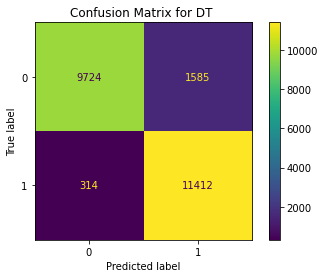

In [9]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for DT : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for DT ")
f1_test1.append(Score)

F1 score : -> 0.8048727049647254

Classification Report for DT : 

              precision    recall  f1-score   support

           0       0.71      0.92      0.80      9711
           1       0.92      0.72      0.80     12833

    accuracy                           0.80     22544
   macro avg       0.81      0.82      0.80     22544
weighted avg       0.83      0.80      0.80     22544


Confusion Matrix  :
 [[8907  804]
 [3649 9184]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


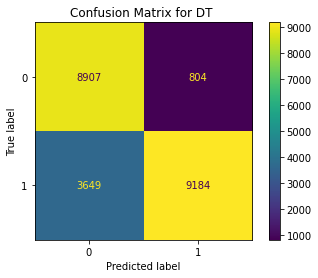

In [10]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for DT : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for DT ")
f1_test2.append(Score)

# Random Forest

In [11]:
classifier = RandomForestClassifier()
#param_grid_dt = dict(max_depth=depth_range)
param = {
    'n_estimators': [10, 30, 50, 80, 100, 200]
    #'n_estimators': [80]
}
grid = GridSearchCV(classifier, param, cv=10, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

1.0
{'n_estimators': 10}
RandomForestClassifier(n_estimators=10)


RandomForestClassifier(n_estimators=10)

In [12]:
algorithm.append('RF')

F1 score : -> 0.9182516140289653

Classification Report for RF : 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11309
           1       0.94      0.90      0.92     11726

    accuracy                           0.92     23035
   macro avg       0.92      0.92      0.92     23035
weighted avg       0.92      0.92      0.92     23035


Confusion Matrix  :
 [[10636   673]
 [ 1201 10525]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


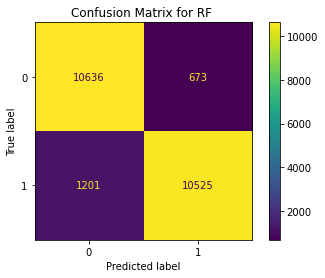

In [13]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for RF : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for RF ")
f1_test1.append(Score)

F1 score : -> 0.7448295672156261

Classification Report for RF : 

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.97      0.61      0.74     12833

    accuracy                           0.76     22544
   macro avg       0.81      0.79      0.76     22544
weighted avg       0.83      0.76      0.76     22544


Confusion Matrix  :
 [[9435  276]
 [5054 7779]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


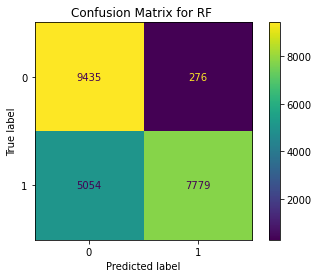

In [14]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for RF : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for RF ")
f1_test2.append(Score)

# KNN

In [15]:
classifier = KNeighborsClassifier()
#param_grid_dt = dict(max_depth=depth_range)
param = {
    'n_neighbors': list(range(1, 4))
    #'n_neighbors': [1]
}
grid = GridSearchCV(classifier, param, cv=10, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

1.0
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


KNeighborsClassifier(n_neighbors=1)

In [16]:
algorithm.append('KNN')

F1 score : -> 0.8534049230536545

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.95      0.70      0.80     11309
           1       0.77      0.96      0.85     11726

    accuracy                           0.83     23035
   macro avg       0.86      0.83      0.83     23035
weighted avg       0.86      0.83      0.83     23035


Confusion Matrix  :
 [[ 7873  3436]
 [  441 11285]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


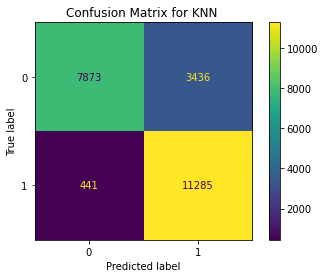

In [17]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for KNN ")
f1_test1.append(Score)

F1 score : -> 0.8461883073247219

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.83      0.73      0.77      9711
           1       0.81      0.88      0.85     12833

    accuracy                           0.82     22544
   macro avg       0.82      0.81      0.81     22544
weighted avg       0.82      0.82      0.82     22544


Confusion Matrix  :
 [[ 7091  2620]
 [ 1500 11333]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


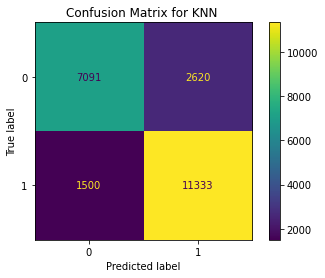

In [18]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for KNN ")
f1_test2.append(Score)

# Logistic Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

classifier = LogisticRegression()
#param_grid_dt = dict(max_depth=depth_range)
param = {
    'solver': ['lbfgs'],'penalty':[ 'l1', 'l2', 'elasticnet']
    #'solver': ['lbfgs'],'penalty':['l2']
}
grid = GridSearchCV(classifier, param, cv=10, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

1.0
{'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression()


LogisticRegression()

In [20]:
algorithm.append('LR')

F1 score : -> 0.90860048640283

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11309
           1       0.94      0.88      0.91     11726

    accuracy                           0.91     23035
   macro avg       0.91      0.91      0.91     23035
weighted avg       0.91      0.91      0.91     23035


Confusion Matrix  :
 [[10694   615]
 [ 1452 10274]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


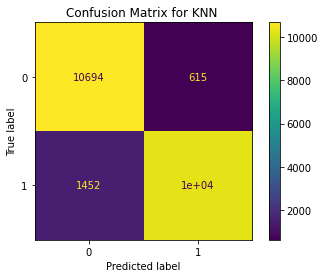

In [21]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for KNN ")
f1_test1.append(Score)

F1 score : -> 0.7906224030092289

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.70      0.90      0.78      9711
           1       0.90      0.70      0.79     12833

    accuracy                           0.79     22544
   macro avg       0.80      0.80      0.79     22544
weighted avg       0.81      0.79      0.79     22544


Confusion Matrix  :
 [[8719  992]
 [3795 9038]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


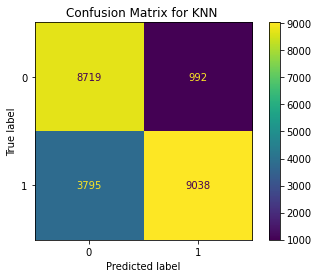

In [22]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for KNN ")
f1_test2.append(Score)

# XGboost

In [23]:
classifier = XGBClassifier(learning_rate=0.02, n_estimators=600, use_label_encoder=False,eval_metric='logloss')
param = {
    'max_depth': [2, 4, 5]
    #'max_depth': [5]
}
grid = GridSearchCV(classifier, param, cv=5, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

1.0
{'max_depth': 2}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [24]:
algorithm.append('XGboost')

F1 score : -> 0.9244916461598238

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11309
           1       0.94      0.91      0.92     11726

    accuracy                           0.92     23035
   macro avg       0.92      0.92      0.92     23035
weighted avg       0.92      0.92      0.92     23035


Confusion Matrix  :
 [[10579   730]
 [ 1019 10707]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


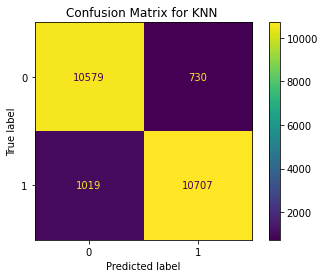

In [25]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for KNN ")
f1_test1.append(Score)

F1 score : -> 0.8032543713759159

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.70      0.95      0.81      9711
           1       0.95      0.70      0.80     12833

    accuracy                           0.81     22544
   macro avg       0.83      0.82      0.81     22544
weighted avg       0.84      0.81      0.81     22544


Confusion Matrix  :
 [[9232  479]
 [3898 8935]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


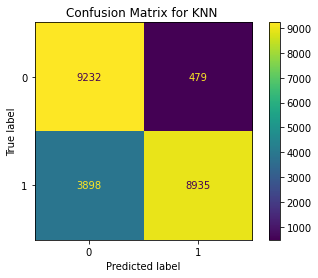

In [26]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for KNN ")
f1_test2.append(Score)

# Majority Voting

In [27]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('DT', DecisionTreeClassifier(max_depth=16)))
models.append(('XGBoost', XGBClassifier(learning_rate=0.02, n_estimators=600, use_label_encoder=False, eval_metric='logloss', max_depth= 5)))

In [28]:
model = VotingClassifier(estimators=models, voting='soft')
model.fit(X,y)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=1)),
                             ('DT', DecisionTreeClassifier(max_depth=16)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='logloss', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.02,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
     

In [29]:
algorithm.append('Ensemble')

F1 score : -> 0.946736116945308

Classification Report for Ensemble : 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     11309
           1       0.93      0.96      0.95     11726

    accuracy                           0.94     23035
   macro avg       0.95      0.94      0.94     23035
weighted avg       0.95      0.94      0.94     23035


Confusion Matrix  :
 [[10498   811]
 [  457 11269]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


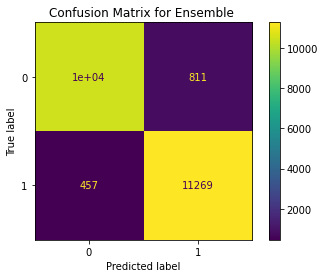

In [30]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for Ensemble : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for Ensemble ")
f1_test1.append(Score)

F1 score : -> 0.867914979757085

Classification Report for Ensemble : 

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      9711
           1       0.95      0.80      0.87     12833

    accuracy                           0.86     22544
   macro avg       0.86      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544


Confusion Matrix  :
 [[ 9122   589]
 [ 2543 10290]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


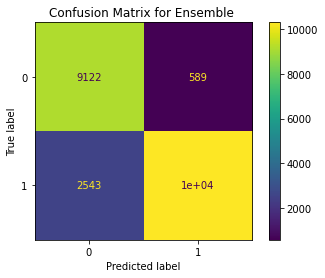

In [31]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for Ensemble : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for Ensemble ")
f1_test2.append(Score)

# Results

In [32]:
for i in range(0, len(algorithm)):
    f1_test1[i] = round(f1_test1[i], 3)
    f1_test2[i] = round(f1_test2[i], 3)

In [33]:
f1_test2

[0.805, 0.745, 0.846, 0.791, 0.803, 0.868]

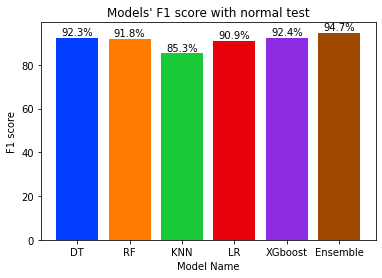

In [34]:
x1 = algorithm
y1 = [round(num, 3)*100 for num in f1_test1] 
plt.title("Models' F1 score with normal test")
plt.xlabel('Model Name')
plt.ylabel("F1 score")
colors = sns.color_palette("bright")
plot = plt.bar(x1,y1,color=colors)
for value in plot:
    height = value.get_height()
    height =float(f'{height:.3f}')
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%s' % (height)+'%', ha='center', va='bottom')
    

plt.show()

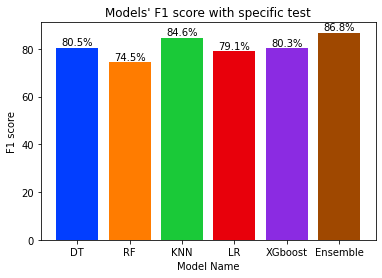

In [35]:
x1 = algorithm
y2 = [round(num, 3)*100 for num in f1_test2] 
plt.title("Models' F1 score with specific test")
plt.xlabel('Model Name')
plt.ylabel("F1 score")
colors = sns.color_palette("bright")
plot = plt.bar(x1,y2,color=colors)
for value in plot:
    height = value.get_height()
    height =float(f'{height:.3f}')
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%s' % (height)+'%', ha='center', va='bottom')
    

plt.show()

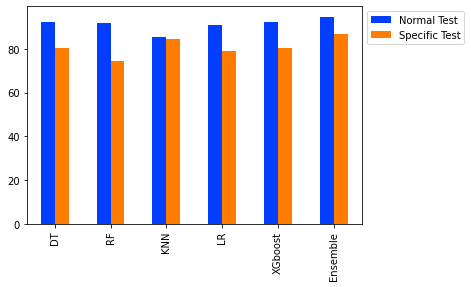

In [36]:
fig, ax = plt.subplots()

plotdata = pd.DataFrame(
    {"Normal Test": y1,"Specific Test": y2}, 
    index=algorithm)
# Plot a bar chart
plotdata.plot(kind="bar",ax=ax,color=colors)
ax.legend(["Normal Test", "Specific Test"]);

plt.legend(bbox_to_anchor=(1.0, 1.0))


In [37]:
print(algorithm)
print(y1)
print(y2)

['DT', 'RF', 'KNN', 'LR', 'XGboost', 'Ensemble']
[92.30000000000001, 91.8, 85.3, 90.9, 92.4, 94.69999999999999]
[80.5, 74.5, 84.6, 79.10000000000001, 80.30000000000001, 86.8]
